<a href="https://colab.research.google.com/github/timcsmith/MIS536-Public/blob/master/Notebooks/class09_example4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder


In [2]:
logit_df = pd.read_csv("https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/logit.csv")
logit_df

,X,Y
0,0.5,Blue
1,1.1,Blue
2,1.5,Blue
3,2.0,Blue
4,3.3,Blue
5,4.7,Blue
6,5.3,Blue
7,7.0,Blue
8,6.5,Blue
9,7.5,Blue


In [3]:
encoder = LabelEncoder()
encoder.fit(logit_df.Y)
logit_df['Y'] = 1 - encoder.transform(logit_df['Y']) 

In [4]:
X = logit_df[['X']]
X

,X
0,0.5
1,1.1
2,1.5
3,2.0
4,3.3
5,4.7
6,5.3
7,7.0
8,6.5
9,7.5


In [5]:
y = logit_df[['Y']]
y

,Y
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(logit_df.X,logit_df.Y, test_size=.3, random_state=1)

In [7]:
train_X=pd.DataFrame(train_X)
valid_X=pd.DataFrame(valid_X)

In [8]:
logClassifier = LogisticRegression(random_state=1)
logClassifier.fit(train_X,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic: ROC AUC=0.900
No Skill: ROC AUC=0.500


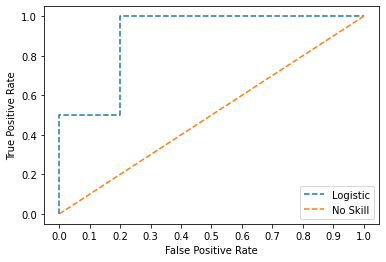

In [11]:
model_probs = logClassifier.predict_proba(valid_X)[:,1]
ns_probs = [0 for _ in range(len(valid_y))]

# calculate scores
model_auc = roc_auc_score(valid_y, model_probs)
ns_auc = roc_auc_score(valid_y, ns_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (model_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
model_fpr, model_tpr, _ = roc_curve(valid_y, model_probs)
ns_fpr, ns_tpr, _ = roc_curve(valid_y, ns_probs)

# plot the roc curve for the model
plt.plot(model_fpr, model_tpr, linestyle='--', label='Logistic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xticks(np.arange(0,1.1, .1))

# show the legend
plt.legend()
# show the plot
plt.show()